<a href="https://colab.research.google.com/github/jimin0308go/pythonclass/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



인공지능 > 머신러닝 > 딥러닝

머신러닝 (기계학습)

정답이 있는 입력 데이터를 모델에 투입하면 머신러닝 모델이 입력 데이터와 정답 사이의 관계를 찾는다. 따라서 새로운 데이터를 입력했을 때 모델이 파악한 관계식을 적용하여 결과를 예측할 수 있다. 또한 정답이 주어지지 않는 경우에도 스스로 데이터속에 숨어 있는 패턴이나 규칙을 알아내는 것도 가능하다. 

- 지도학습 supervised learning
  학습 과정에서 정답이 주어진다. 


- 비지도학습 unsupervised learning
  학습 과정에서 정답이 주어지지 않는다. 



회귀 regression, 분류 classification


머신러닝의 프로세스

문제 파악  ->  데이터 탐색  ->  전처리  -> 모델 학습  ->  예측

In [ ]:
# 붓꽃 분류

# 필요한 모듈 읽어오기

import pandas as pd          # 분석 모듈
import numpy as np           # 계산 모듈
from sklearn import datasets # 학습용 붓꽃 데이터 포함 

iris = datasets.load_iris()


In [ ]:
print(iris['DESCR'])  # 데이터 셋에 대한설명

# 데이터셋에는 150개의 샘플이 들어 있고 각각 50개의 3개종의 데이터가 들어 있다. 
# 설명 변수  4가지
#        - sepal length in cm  꽃 받침 길이
#        - sepal width in cm   꽃 받침 너비
#        - petal length in cm  꽃 잎의 길이
#        - petal width in cm   꽃 잎의 너비

# 목표 변수  3가지
#                - Iris-Setosa
#                - Iris-Versicolour
#                - Iris-Virginica


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
print("데이터셋의 크기 : ", iris['target'].shape)
print("데이터셋의 내용 : ", iris['target'])

데이터셋의 크기 :  (150,)
데이터셋의 내용 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print("데이터셋의 크기 : ", iris['data'].shape)
print("데이터셋의 내용 : ", iris['data'])

데이터셋의 크기 :  (150, 4)
데이터셋의 내용 :  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4

In [ ]:
# 데이터 프레임으로 전환

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])  # 데이터 프레임 만들기
df.head()                                                       # 위쪽 일부만 출력

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df.columns = ['sepal_length', 'sepal_width','petal_length', 'petal_width']
df.head() 

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['Target'] = iris['target']
df.tail()                       # head는 위쪽 일부만 확인  tail 끝쪽 일부만 대략 확인

,sepal_length,sepal_width,petal_length,petal_width,Target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
# step 1 데이터를 사용하여 붓꽃의 종류를 분류할수 있는 인공지능 모델을 만들자. 
print(df)

     sepal_length  sepal_width  petal_length  petal_width  Target
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]


In [ ]:
# step 2 데이터 탐색

# 기본정보

df.info()   # 데이터의 기본정보 보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df.describe()   # 통계 정보 요약 - 평균, 표준편차,최소값 최대값 등 통계 정보 요약

,sepal_length,sepal_width,petal_length,petal_width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# null 결측치 확인 - 데이터 분석이나 머신러닝에서는 결측치의 처리가 상당히 중요하다. 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Target          0
dtype: int64

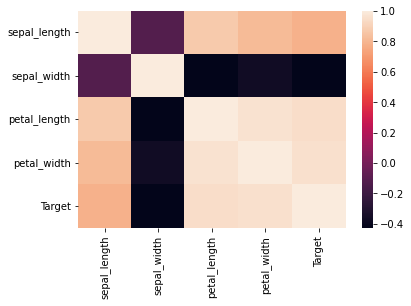

In [ ]:
# 시각화 - 데이터를 숫자로만 봤을때와는 다른 시각을 갖을 수 있다. 
# 파이썬에서는 matplotlib 와 seaborn 을 사용하여 데이터를 시각화 할수 있다. 
# corr() 상관계수
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data=df.corr())
plt.show()


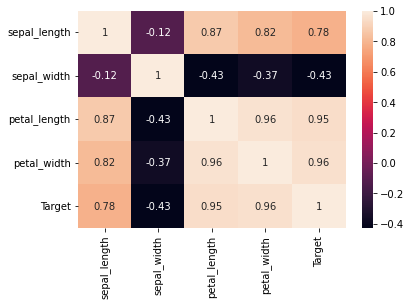

In [ ]:
sns.heatmap(data=df.corr(),annot=True)
plt.show()

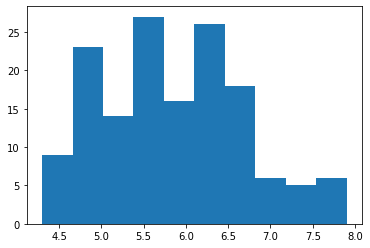

In [ ]:
plt.hist(x='sepal_length', data=df)
plt.show()

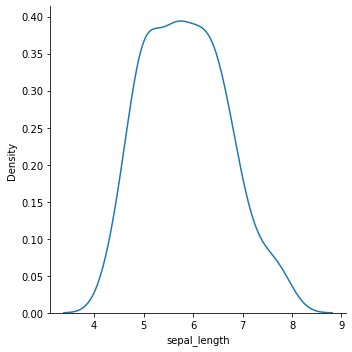

In [ ]:
sns.displot(x='sepal_length', kind='kde', data=df)

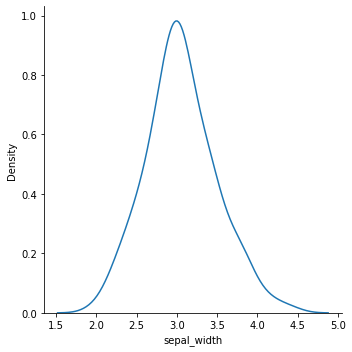

In [ ]:
sns.displot(x='sepal_width', kind='kde', data=df)

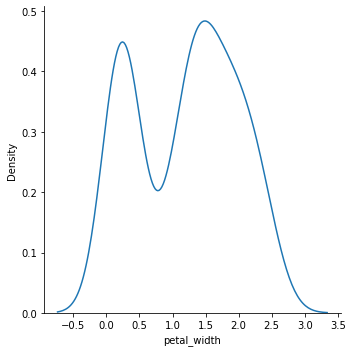

In [ ]:
sns.displot(x='petal_width', kind='kde', data=df)

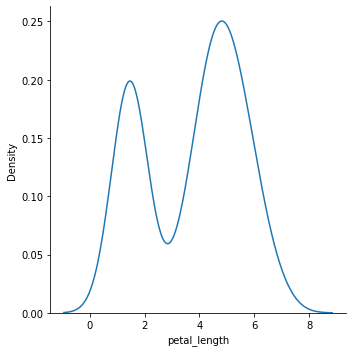

In [ ]:
sns.displot(x='petal_length', kind='kde', data=df)

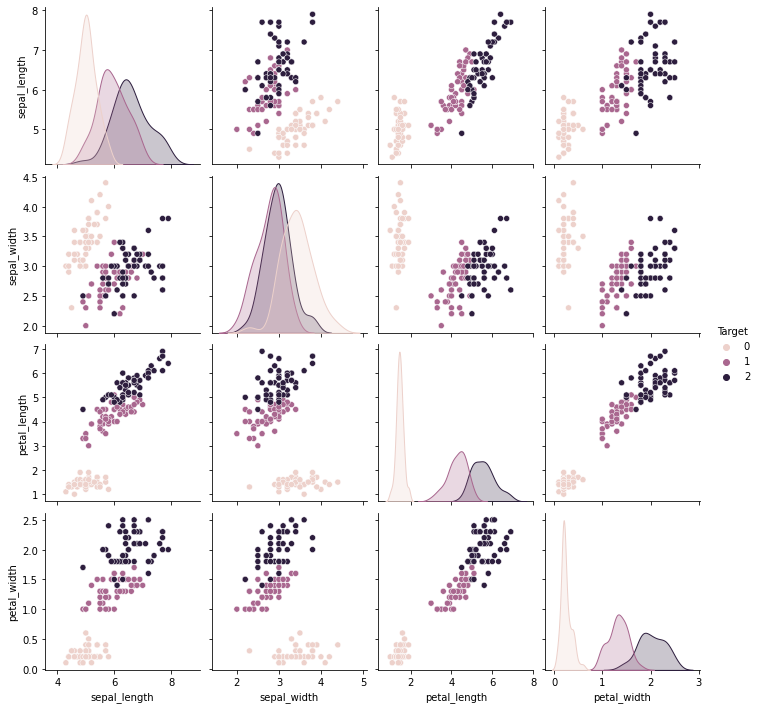

In [ ]:
sns.pairplot(df, hue='Target')

In [ ]:
# 전처리

# 원래 전처리 과정(결측치 처리, 이상치 처리) 은 가장 비중이 크고 다양하다. 오늘은 전처리는 간단히 살펴보고 모델학습에 비중을 늘리도록 한다. 

# 훈련용과 검증용 데이터셋 분할

from sklearn.model_selection import train_test_split
# 여기서 X는 대문자로 y는 소문자로 표현 했다는 점에 유의하자 

X_data = df.loc[:,'petal_length':'petal_width']  #문제지 추출
y_data = df.loc[:,'Target']                      #답안지 추출

# X_train 훈련용 문제지, X_test 훈련용 답안지, y_train 검증용 문제지, y_test 검증용 답안지
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True, random_state=20)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(120, 2) (120,)
(30, 2) (30,)


In [ ]:
# step 3 모델 학습

# KNN (K-Nearest-Neighbors) K근접이웃 algorithm

# 예측(분류)하려는 데이터 X가 주어졌을 때 기존 데이터 중 속성이 비슷한 K개의 이웃을 찾는다. 
# 데이터 X의 가까운 주변을 둘러싼 K개가 많이 속해 있는 목표 클래스를 예측값으로 결정하게 된다. 

# 가까운 이웃을 3으로 설정 할때는 삼각형 클래스에 속하는 데이터가 2개로 가장 많고
# 가까운 이웃을 5개로 설정 할때는 사각형 클래스에 속하는 데이터가 3개로 가장 많게 된다. 
# 따라서 K값에 따라 KNN모델이 예측하는 클래스가 달라질 수 있다. 

from sklearn.neighbors import KNeighborsClassifier # KNN모듈 가져오기
knn = KNeighborsClassifier(n_neighbors= 1)         # 객체 생성하면서 K값 설정
knn.fit(X_train, y_train)                          # 훈련용 문제와 답안지 

y_knn_pred = knn.predict(X_test)                   # 검증용 문제지만 제공

from sklearn.metrics import accuracy_score         # 채점 모듈
knn_acc = accuracy_score(y_test, y_knn_pred)       # 실제 답안지와 비교
 
print(knn_acc)                                     # 비교 결과 정확도

# k = 3    0.9333333333333333
# k = 5    0.9333333333333333
# k = 20   0.9666666666666667
# k = 50   0.9333333333333333

0.9333333333333333


In [ ]:
# Decision Tree 의사결정나무 algorithm

# 의사 결정 나무 모델은 이진 트리 알고리즘을 사용한다. 트리의 각 분기점에는 데이터 셋의
# 속성 값을 하나씩 위치 시킨다. 임의의 조건을 스스로 설정하여 계속 2개의 줄기로 가지를 나누면서
# 데이터를 구분한다. 이 때 각 분기점에서 분류가 가장 잘되는 최적의 기준을 찾는 과정이 중요하다. 

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=1, random_state = 0)
dtc.fit(X_train, y_train)

y_dtc_pred = dtc.predict(X_test)   

from sklearn.metrics import accuracy_score         # 채점 모듈
dtc_acc = accuracy_score(y_test, y_dtc_pred)       # 실제 답안지와 비교
 
print(dtc_acc)   

# max_depth=1 0.6333333333333333
# max_depth=3 0.9333333333333333

0.6333333333333333


In [ ]:
# SVM (Support Vector Machine) Algorithm

